Saving cat.jpg to cat.jpg
Enter secret message: i have the gun
Enter password: 1234


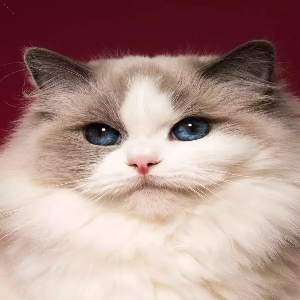

Enter passcode for Decryption: 1234
Decrypted message: i have the gun


In [1]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow  # For image display in Colab
from google.colab import files

# Upload image manually in Colab or use a default one
uploaded = files.upload()

# Read the uploaded image
img = cv2.imread(list(uploaded.keys())[0])

# Resize image for enough pixel space
img = cv2.resize(img, (300, 300))  # Ensure sufficient space for message

msg = input("Enter secret message: ")
password = input("Enter password: ")

d = {chr(i): i for i in range(256)}
c = {i: chr(i) for i in range(256)}

m, n, z = 0, 0, 0

# Encrypt message into image pixels
for i in range(len(msg)):
    if n >= img.shape[0] or m >= img.shape[1]:
        print("Message too long for this image!")
        break
    img[n, m, z] = d[msg[i]]
    n = (n + 1) % img.shape[0]
    m = (m + 1) % img.shape[1]
    z = (z + 1) % 3

# Save and display the encrypted image
cv2.imwrite("Encryptedmsg.jpg", img)
cv2_imshow(img)

# Decryption process
message = ""
n, m, z = 0, 0, 0

pas = input("Enter passcode for Decryption: ")

if password == pas:
    for i in range(len(msg)):
        message += c[img[n, m, z]]
        n = (n + 1) % img.shape[0]
        m = (m + 1) % img.shape[1]
        z = (z + 1) % 3
    print("Decrypted message:", message)
else:
    print("Invalid password!")


In [2]:
from google.colab import files
files.download("Encryptedmsg.jpg")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>